In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import ImageGrid, make_axes_locatable

In [2]:
def log_prob2(taut, gamma, k):
    qt = 1 - np.exp(- gamma ** 2 / 2 * k)
    return (1 - taut * qt) * np.log(1 - qt) + 1 - .5 * (1 - taut * qt) ** 2

def log_prob_raw(taut, gamma, k):
    qt = 1 - np.exp(- gamma ** 2 / 2 * k)
    return (1 - taut * qt) * np.log(1 - qt) + taut * qt * np.log(np.exp(1) / (taut * qt))

def factor(taut, gamma, k):
    qt = 1 - np.exp(- gamma ** 2 / 2 * k)
    return taut * qt

def log_prob_ub(taut, gamma, k):
    qt = 1 - np.exp(- gamma ** 2 / 2 * k)
    return (1 - taut * qt) * np.log(1 - qt) + 1 - (1 - taut * qt) ** 2 / 2

In [3]:
# Generate a grid of (x, y) values
tau = np.linspace(0, 1, 250)
gamma = np.linspace(0, 1, 250)
TAUT, GAMMA = np.meshgrid(tau, gamma)

In [4]:
ks = np.arange(1, 75)
Zs = []
factors = []
for i, k in enumerate(ks):
    # Evaluate the function on the grid
    Zs.append(log_prob_raw(TAUT, GAMMA, k=k))
    factors.append(factor(TAUT, GAMMA, k=k))

# # Find the global min and max values
# vmin = min(*[np.min(Z) for Z in Zs])
# vmax = max(*[np.max(Z) for Z in Zs])

/var/folders/p9/v1s296351mnf3yx7kphc3bq00000gn/T/ipykernel_9832/2757312836.py:7: RuntimeWarning: divide by zero encountered in divide
  return (1 - taut * qt) * np.log(1 - qt) + taut * qt * np.log(np.exp(1) / (taut * qt))
/var/folders/p9/v1s296351mnf3yx7kphc3bq00000gn/T/ipykernel_9832/2757312836.py:7: RuntimeWarning: invalid value encountered in multiply
  return (1 - taut * qt) * np.log(1 - qt) + taut * qt * np.log(np.exp(1) / (taut * qt))


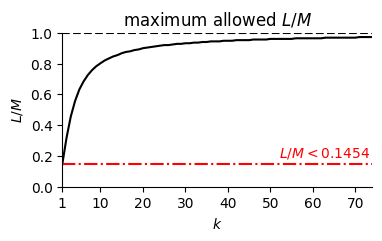

In [5]:
max_factors = []
for i, k in enumerate(ks):
    # Evaluate the function on the grid
    factor_ = factors[i][1:, :]
    Z = np.nan_to_num(Zs[i][1:, :], nan=np.inf)
    filtered_Z = (factor_ * (Z < 0.))[(factor_ * (Z < 0.)) > 0]
    max_factor = np.max(filtered_Z)
    min_factor = np.min(filtered_Z)
    # print(k, min_factor, max_factor)
    max_factors.append(max_factor)    

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
ax.plot(ks, max_factors, marker='', color='k')
ax.axhline(y=1.0, linestyle='--', color='k')
ax.set_ylim([0, 1])
ax.set_xlim([1, max(ks)])
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$L/M$')
ax.set_title(r'maximum allowed $L/M$')

ax.axhline(y=max_factors[0], color='r', linestyle='-.')

ax.text(
    x=len(ks) - 22, 
    y=max_factors[0] + 0.05,
    s=rf'$L/M <${max_factors[0]:.4f}', 
    color='r'
)

ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks([1] + list(np.arange(10, max(ks), 10)));
plt.savefig('figs/maximum_allowed_factors.pdf', bbox_inches='tight')

In [6]:
# Consider a smaller range of k's for the rest of figures
ks = np.arange(1, 15, 2)
Zs = []
factors = []
for i, k in enumerate(ks):
    # Evaluate the function on the grid
    Zs.append(log_prob_raw(TAUT, GAMMA, k=k))
    factors.append(factor(TAUT, GAMMA, k=k))

/var/folders/p9/v1s296351mnf3yx7kphc3bq00000gn/T/ipykernel_9832/2757312836.py:7: RuntimeWarning: divide by zero encountered in divide
  return (1 - taut * qt) * np.log(1 - qt) + taut * qt * np.log(np.exp(1) / (taut * qt))
/var/folders/p9/v1s296351mnf3yx7kphc3bq00000gn/T/ipykernel_9832/2757312836.py:7: RuntimeWarning: invalid value encountered in multiply
  return (1 - taut * qt) * np.log(1 - qt) + taut * qt * np.log(np.exp(1) / (taut * qt))


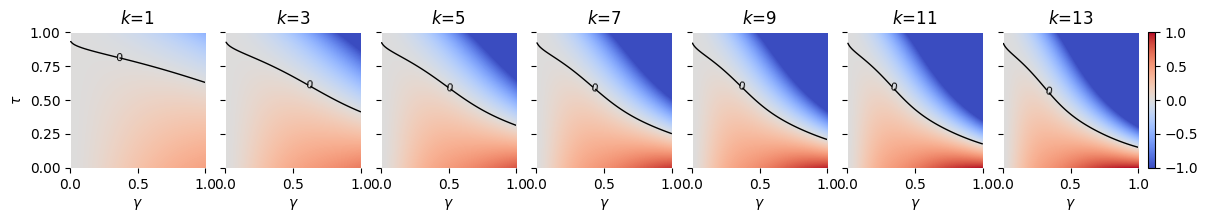

In [7]:
fig = plt.figure(figsize=(len(ks) * 2, 2))
axes = ImageGrid(
    fig, 
    111,
    nrows_ncols = (1, len(ks)),
    axes_pad = 0.2,
    cbar_location="right",
    cbar_mode="single",
    cbar_size="5%",
    cbar_pad=0.1
)

vmin = -1
vmax = 1
# Normalize with the center at 0
norm = colors.TwoSlopeNorm(vmin=vmin, vmax=vmax, vcenter=0)

# fig, axes = plt.subplots(ncols=len(ks), figsize=(len(ks) * 2, 2), sharey=True)
for i, k in enumerate(ks):
    # Evaluate the function on the grid
    Z = Zs[i]
    
    # Overlay the contour corresponding to (almost) zeros
    contour = axes[i].contour(GAMMA, 1 - TAUT, Z, levels=[0], colors='black', linewidths=1)
    plt.clabel(contour, fmt='0', inline=True, fontsize=8)

    # Create a scatter plot
    # ax_ = axes[i].scatter(GAMMA, 1 - TAUT, c=Z, cmap='coolwarm', norm=norm)
    ax_ = axes[i].imshow(Z[:, ::-1].T, extent=[0, 1, 0, 1], origin='lower', cmap='coolwarm', norm=norm)
    axes[i].set_xlabel(r'$\gamma$')
    if i == 0:
        axes[i].set_ylabel(r'$\tau$')
    axes[i].axis('square')
    axes[i].set_xlim([0., 1])
    axes[i].set_ylim([0., 1])
    axes[i].set_title(rf'$k$={k}')
    axes[i].spines[['left', 'bottom', 'right', 'top']].set_visible(False)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(ax_, cax=cax)
plt.colorbar(ax_, cax=axes.cbar_axes[0])
# cbar = fig.colorbar(ax_, ax=axes, orientation='vertical', pad=0.5)

# plt.tight_layout()
plt.savefig('figs/fixed_k_valid_gamma_tau_pairs.pdf', bbox_inches='tight')
plt.show()


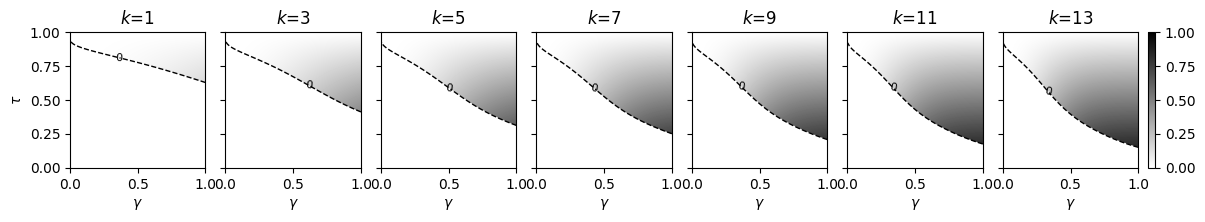

In [8]:
fig = plt.figure(figsize=(len(ks) * 2, 2))
axes = ImageGrid(
    fig, 
    111,
    nrows_ncols = (1, len(ks)),
    axes_pad = 0.2,
    cbar_location="right",
    cbar_mode="single",
    cbar_size="5%",
    cbar_pad=0.1
)

vmin = 0.
vmax = 1.
# Normalize with the center at 0
norm = colors.TwoSlopeNorm(vmin=vmin, vmax=vmax, vcenter=0.5)

# fig, axes = plt.subplots(ncols=len(ks), figsize=(len(ks) * 2, 2), sharey=True)
for i, k in enumerate(ks):
    # Evaluate the function on the grid
    factor_ = factors[i]
    Z = Zs[i]
    
    # Overlay the contour corresponding to (almost) zeros
    contour = axes[i].contour(GAMMA, 1 - TAUT, Z, levels=[0], colors='black', linewidths=1, linestyles='--')
    plt.clabel(contour, fmt='0', inline=True, fontsize=8)
    
    # Create a scatter plot
    ax_ = axes[i].imshow((factor_ * (Z < 0.))[:, ::-1].T, extent=[0, 1, 0, 1], origin='lower', cmap='binary', norm=norm)
    axes[i].set_xlabel(r'$\gamma$')
    if i == 0:
        axes[i].set_ylabel(r'$\tau$')
    axes[i].axis('square')
    axes[i].set_xlim([0., 1])
    axes[i].set_ylim([0., 1])
    axes[i].set_title(rf'$k$={k}')
    # axes[i].spines[['left', 'bottom', 'right', 'top']].set_visible(False)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(ax_, cax=cax)
plt.colorbar(ax_, cax=axes.cbar_axes[0])
# cbar = fig.colorbar(ax_, ax=axes, orientation='vertical', pad=0.5)

# plt.tight_layout()
plt.savefig('figs/fixed_k_factors.pdf', bbox_inches='tight')
plt.show()
